In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [2]:
response=requests.get("https://www.sofascore.com/football/match/liverpool-chelsea/NsU#id:14025221,tab:statistics")

In [3]:
response.status_code

200

In [4]:
soup=BeautifulSoup(response.text,"html.parser")

In [5]:
soup.select('g[cursor="pointer"]')

[]

In [6]:
response.status_code

200

In [7]:
headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.sofascore.com/football/match/liverpool-chelsea/NsU',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
}

url = 'https://www.sofascore.com/api/v1/event/14025221/shotmap'

response = requests.get(url, headers=headers)

print(response.status_code)

200


In [8]:
shots=response.json()

In [9]:
df=pd.json_normalize(shots["shotmap"])

In [10]:
df

,isHome,shotType,goalType,situation,bodyPart,goalMouthLocation,xg,xgot,id,time,...,draw.end.x,draw.end.y,draw.goal.x,draw.goal.y,player.lastName,blockCoordinates.x,blockCoordinates.y,blockCoordinates.z,draw.block.x,draw.block.y
0,True,goal,regular,assisted,right-foot,low-centre,0.368511,0.770754,5840370,90,...,51.0,0,51.0,97.5,NaN,NaN,NaN,NaN,NaN,NaN
1,False,miss,NaN,assisted,right-foot,high,0.165558,0.000000,5840345,90,...,48.7,0,48.7,19.4,,NaN,NaN,NaN,NaN,NaN
2,True,post,NaN,assisted,head,left,0.328402,0.000000,5840321,90,...,44.6,0,44.6,74.1,,NaN,NaN,NaN,NaN,NaN
3,False,miss,NaN,fast-break,right-foot,close-left,0.048787,0.000000,5840310,90,...,43.9,0,43.9,95.8,NaN,NaN,NaN,NaN,NaN,NaN
4,True,save,NaN,corner,head,low-left,0.016981,0.158069,5840309,89,...,45.8,0,45.8,82.3,,1.6,47.1,0.0,47.1,1.6
5,True,save,NaN,regular,right-foot,high-centre,0.018911,0.010210,5840301,89,...,50.0,0,50.0,67.1,,2.2,50.2,0.0,50.2,2.2
6,True,save,NaN,regular,left-foot,low-left,0.037738,0.610851,5840240,84,...,46.0,0,46.0,81.6,NaN,1.9,54.2,0.0,54.2,1.9
7,True,save,NaN,assisted,right-foot,low-centre,0.024681,0.023210,5840241,84,...,51.6,0,51.6,86.1,NaN,2.0,48.7,0.0,48.7,2.0
8,False,block,NaN,regular,left-foot,low-centre,0.048497,0.000000,5840225,81,...,51.4,0,51.4,81.0,NaN,17.3,53.8,0.0,53.8,17.3
9,False,block,NaN,assisted,left-foot,low-right,0.144102,0.000000,5840214,81,...,52.0,0,52.0,81.0,NaN,10.2,48.0,0.0,48.0,10.2


In [11]:
df.columns

Index(['isHome', 'shotType', 'goalType', 'situation', 'bodyPart',
       'goalMouthLocation', 'xg', 'xgot', 'id', 'time', 'addedTime',
       'timeSeconds', 'reversedPeriodTime', 'reversedPeriodTimeSeconds',
       'periodTimeSeconds', 'incidentType', 'player.name', 'player.firstName',
       'player.slug', 'player.shortName', 'player.position',
       'player.jerseyNumber', 'player.userCount', 'player.sofascoreId',
       'player.id', 'player.fieldTranslations.nameTranslation.ar',
       'player.fieldTranslations.nameTranslation.hi',
       'player.fieldTranslations.nameTranslation.bn',
       'player.fieldTranslations.shortNameTranslation.ar',
       'player.fieldTranslations.shortNameTranslation.hi',
       'player.fieldTranslations.shortNameTranslation.bn',
       'playerCoordinates.x', 'playerCoordinates.y', 'playerCoordinates.z',
       'goalMouthCoordinates.x', 'goalMouthCoordinates.y',
       'goalMouthCoordinates.z', 'draw.start.x', 'draw.start.y', 'draw.end.x',
       'draw.e

In [12]:
df=df[["isHome","shotType","goalType","xg","xgot","time","player.shortName","player.position","player.jerseyNumber","playerCoordinates.x",
       "playerCoordinates.y","goalMouthCoordinates.x","goalMouthCoordinates.y"]]

In [13]:
df

,isHome,shotType,goalType,xg,xgot,time,player.shortName,player.position,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,True,goal,regular,0.368511,0.770754,90,Estêvão,M,41,3.8,54.7,0,49.0
1,False,miss,NaN,0.165558,0.000000,90,C. Jones,M,17,11.1,66.2,0,51.3
2,True,post,NaN,0.328402,0.000000,90,E. Fernández,M,8,6.7,45.2,0,55.4
3,False,miss,NaN,0.048787,0.000000,90,D. Szoboszlai,M,8,24.2,50.9,0,56.1
4,True,save,NaN,0.016981,0.158069,89,E. Fernández,M,8,12.1,39.4,0,54.2
5,True,save,NaN,0.018911,0.010210,89,M. Caicedo,M,25,27.1,49.9,0,50.0
6,True,save,NaN,0.037738,0.610851,84,Estêvão,M,41,11.9,69.7,0,54.0
7,True,save,NaN,0.024681,0.023210,84,J. Gittens,M,11,19.2,29.3,0,48.4
8,False,block,NaN,0.048497,0.000000,81,D. Szoboszlai,M,8,20.3,54.2,0,48.6
9,False,block,NaN,0.144102,0.000000,81,H. Ekitiké,F,22,14.8,46.2,0,48.0


In [14]:
df["playerCoordinates.x"]=df["playerCoordinates.x"]*1.2
df["playerCoordinates.y"]=df["playerCoordinates.y"]*0.8
df["goalMouthCoordinates.x"]=df["goalMouthCoordinates.x"]*1.2
df["goalMouthCoordinates.y"]=df["goalMouthCoordinates.y"]*0.8

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_18164\1037772248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["playerCoordinates.x"]=df["playerCoordinates.x"]*1.2
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_18164\1037772248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["playerCoordinates.y"]=df["playerCoordinates.y"]*0.8
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_18164\1037772248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [15]:
df

,isHome,shotType,goalType,xg,xgot,time,player.shortName,player.position,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,True,goal,regular,0.368511,0.770754,90,Estêvão,M,41,4.56,43.76,0.0,39.20
1,False,miss,NaN,0.165558,0.000000,90,C. Jones,M,17,13.32,52.96,0.0,41.04
2,True,post,NaN,0.328402,0.000000,90,E. Fernández,M,8,8.04,36.16,0.0,44.32
3,False,miss,NaN,0.048787,0.000000,90,D. Szoboszlai,M,8,29.04,40.72,0.0,44.88
4,True,save,NaN,0.016981,0.158069,89,E. Fernández,M,8,14.52,31.52,0.0,43.36
5,True,save,NaN,0.018911,0.010210,89,M. Caicedo,M,25,32.52,39.92,0.0,40.00
6,True,save,NaN,0.037738,0.610851,84,Estêvão,M,41,14.28,55.76,0.0,43.20
7,True,save,NaN,0.024681,0.023210,84,J. Gittens,M,11,23.04,23.44,0.0,38.72
8,False,block,NaN,0.048497,0.000000,81,D. Szoboszlai,M,8,24.36,43.36,0.0,38.88
9,False,block,NaN,0.144102,0.000000,81,H. Ekitiké,F,22,17.76,36.96,0.0,38.40


In [17]:
for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==False):
        df["playerCoordinates.y"][x]=80 - df["playerCoordinates.y"][x]
    if (df["isHome"][x]==True):
        df["playerCoordinates.y"][x]=80 - df["playerCoordinates.y"][x]

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_18164\1948113594.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["playerCoordinates.y"][x]=80 - df["playerCoordinates.y"][x]
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_18164

In [18]:
df

,isHome,shotType,goalType,xg,xgot,time,player.shortName,player.position,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,True,goal,regular,0.368511,0.770754,90,Estêvão,M,41,4.56,36.24,0.0,39.20
1,False,miss,NaN,0.165558,0.000000,90,C. Jones,M,17,13.32,27.04,0.0,41.04
2,True,post,NaN,0.328402,0.000000,90,E. Fernández,M,8,8.04,43.84,0.0,44.32
3,False,miss,NaN,0.048787,0.000000,90,D. Szoboszlai,M,8,29.04,39.28,0.0,44.88
4,True,save,NaN,0.016981,0.158069,89,E. Fernández,M,8,14.52,48.48,0.0,43.36
5,True,save,NaN,0.018911,0.010210,89,M. Caicedo,M,25,32.52,40.08,0.0,40.00
6,True,save,NaN,0.037738,0.610851,84,Estêvão,M,41,14.28,24.24,0.0,43.20
7,True,save,NaN,0.024681,0.023210,84,J. Gittens,M,11,23.04,56.56,0.0,38.72
8,False,block,NaN,0.048497,0.000000,81,D. Szoboszlai,M,8,24.36,36.64,0.0,38.88
9,False,block,NaN,0.144102,0.000000,81,H. Ekitiké,F,22,17.76,43.04,0.0,38.40


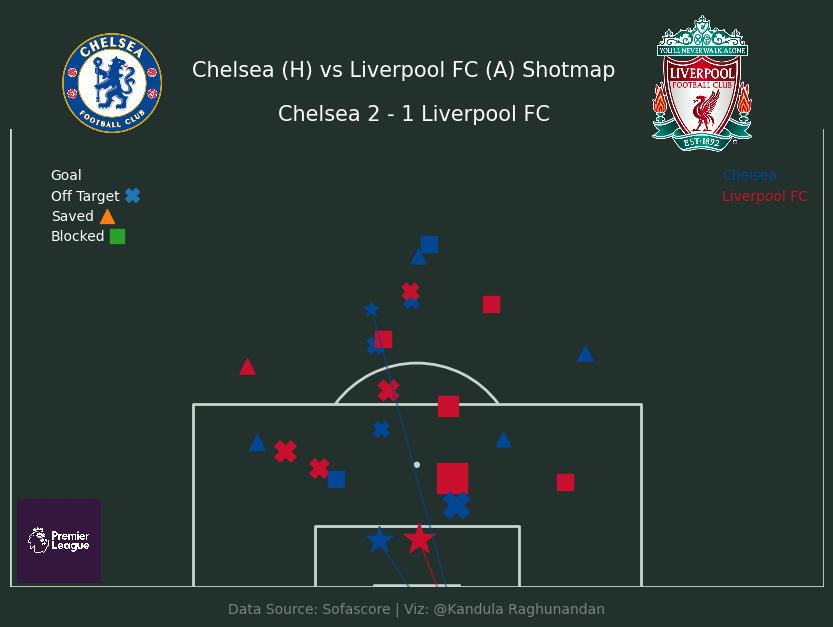

In [59]:
fig, ax=plt.subplots(figsize=(10.5,7))
fig.set_facecolor("#22312b")
ax.patch.set_facecolor("#22312b")

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc',half=True)
pitch.draw(ax=ax, constrained_layout=True, tight_layout=False)
plt.gca().invert_yaxis()

home_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Chelsea.png")
away_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Liverpool.png")
league_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Prem Logo.png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

ax.set_xlim(0,80)
ax.set_ylim(0,45)

for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==True):
        if df["shotType"][x]=="save":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#034694",s=df["xg"][x]*800+100,marker="^")
        if ((df["shotType"][x]=="miss") | (df["shotType"][x]=="post")):
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#034694",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#034694",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#034694",s=df["xg"][x]*800+100,marker="*")
            plt.plot((df["playerCoordinates.y"][x],df["goalMouthCoordinates.y"][x]),(df["playerCoordinates.x"][x],df["goalMouthCoordinates.x"][x]),color="#034694",alpha=0.5)
    if (df["isHome"][x]==False):
        if df["shotType"][x]=="save":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#C8102E",s=df["xg"][x]*800+100,marker="^")
        if ((df["shotType"][x]=="miss") | (df["shotType"][x]=="post")):
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#C8102E",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#C8102E",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#C8102E",s=df["xg"][x]*800+100,marker="*")
            plt.plot((df["playerCoordinates.y"][x],df["goalMouthCoordinates.y"][x]),(df["playerCoordinates.x"][x],df["goalMouthCoordinates.x"][x]),color="#C8102E",alpha=0.5)

plt.title("Chelsea 2 - 1 Liverpool FC ",color="white",size=15)
plt.suptitle("Chelsea (H) vs Liverpool FC (A) Shotmap", fontsize=15, color="white", y=0.92)
ax.text(4,40,"Goal",c="white")
ax.text(4,38,"Off Target",color="white")
ax.scatter(12,38.5,marker="X",s=100)
ax.text(4,36,"Saved",color="white")
ax.scatter(9.5,36.5,marker="^",s=100)
ax.text(4,34,"Blocked",color="white")
ax.scatter(10.5,34.5,marker="s",s=100)

ax.text(70,40,"Chelsea",c="#034694")
ax.text(70,38,"Liverpool FC",c="#C8102E")

add_logo(ax, home_logo, zoom=0.2, xy=(0.125, 1.1))
add_logo(ax, away_logo, zoom=0.2, xy=(0.85, 1.1))
add_logo(ax,league_logo,zoom=0.03, xy=(0.06,0.1))

plt.text(
    0.5, -0.05, "Data Source: Sofascore | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

plt.savefig("C:/Users/K Raghunandan/Analyst/Results/Chelsea_vs_Liverpool_2025.png")

In [51]:
df=df.sort_values("time").reset_index()
df

,index,isHome,shotType,goalType,xg,xgot,time,player.shortName,player.position,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,23,True,goal,regular,0.036623,0.089007,14,M. Caicedo,M,25,27.36,35.52,0.0,42.88
1,22,False,block,NaN,0.463756,0.000000,19,D. Szoboszlai,M,8,10.68,43.44,0.0,41.36
2,21,True,miss,NaN,0.021178,0.000000,26,M. Gusto,D,27,28.20,39.44,0.0,31.36
3,20,True,post,NaN,0.051264,0.000000,38,A. Garnacho,F,49,23.76,35.84,0.0,35.44
4,19,False,miss,NaN,0.180360,0.000000,44,A. Isak,F,9,10.44,43.52,0.0,38.08
5,18,False,miss,NaN,0.109334,0.000000,46,M. Salah,M,11,11.64,30.40,0.0,34.32
6,17,False,save,NaN,0.025944,0.010509,51,R. Gravenberch,M,38,21.72,23.28,0.0,39.52
7,16,True,block,NaN,0.034553,0.000000,52,J. Pedro,F,20,33.72,41.20,0.0,41.36
8,15,False,miss,NaN,0.147891,0.000000,53,M. Salah,M,11,19.32,37.12,0.0,47.84
9,14,True,block,NaN,0.034534,0.000000,59,P. Neto,M,7,10.56,32.00,0.0,39.52


In [52]:
a_xG=[0]
h_xG=[0]
a_min=[0]
h_min=[0]

for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==True):
        h_xG.append(df["xg"][x])
        h_min.append(df["time"][x])
    if (df["isHome"][x]==False):
        a_xG.append(df["xg"][x])
        a_min.append(df["time"][x])

In [53]:
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cum=nums_cumulative_sum(a_xG)
h_cum=nums_cumulative_sum(h_xG)

In [54]:
h_cum

[0,
 np.float64(0.03662321344018),
 np.float64(0.057801442220807),
 np.float64(0.109065936878323),
 np.float64(0.143619058653712),
 np.float64(0.178153416141867),
 np.float64(0.208708537742495),
 np.float64(0.246446499601006),
 np.float64(0.27112793549895203),
 np.float64(0.28810872323811004),
 np.float64(0.30701980553567404),
 np.float64(0.635421877726914),
 np.float64(1.003932869061834)]

In [55]:
a_cum

[0,
 np.float64(0.46375581622124),
 np.float64(0.64411580562592),
 np.float64(0.7534498050809),
 np.float64(0.779393380507836),
 np.float64(0.927283963188536),
 np.float64(1.475244304165256),
 np.float64(1.504915287718189),
 np.float64(1.538348307833088),
 np.float64(1.682450225576768),
 np.float64(1.730947470292459),
 np.float64(1.779734952375303),
 np.float64(1.945292709395303)]

In [56]:
a_total=round(a_cum[-1],2)
h_total=round(h_cum[-1],2)

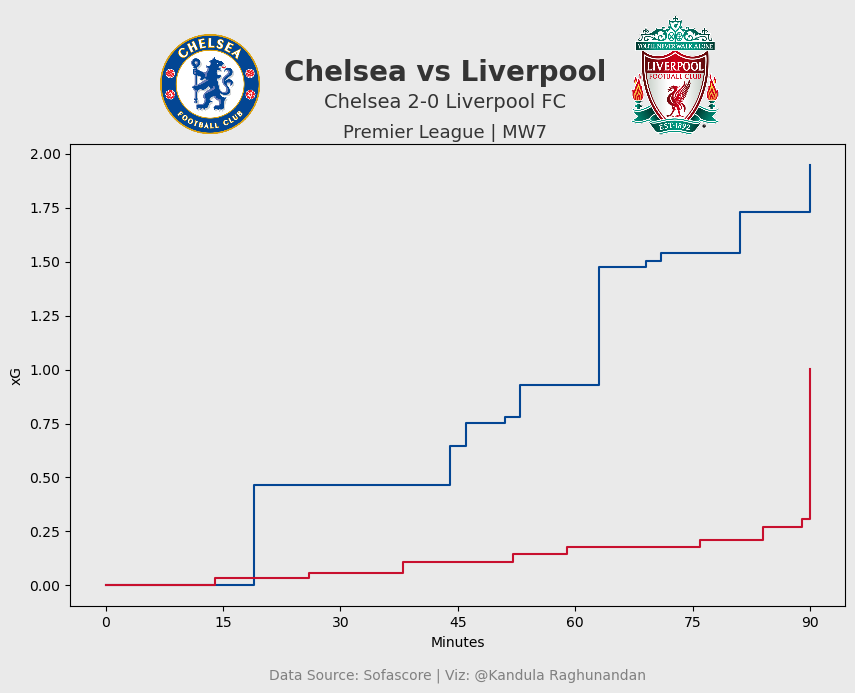

In [125]:
fig,ax=plt.subplots(figsize=(10,6))
fig.set_facecolor("#EAEAEA")
ax.patch.set_facecolor("#EAEAEA")

plt.xticks([0,15,30,45,60,75,90])
plt.xlabel("Minutes")
plt.ylabel("xG")

ax.step(x=a_min,y=a_cum,where="post",color="#034694")
ax.step(x=h_min,y=h_cum,where="post",color="#C8102E")

fig.text(0.5, 1, "Chelsea vs Liverpool", fontsize=20, fontweight='bold', color='#343434', ha="center", va="center")
fig.text(0.5, 0.95, "Chelsea 2-0 Liverpool FC", fontsize=14, color='#343434', ha="center", va="center")
fig.text(0.5, 0.90, "Premier League | MW7", fontsize=13, color='#343434', ha="center", va="center" )

home_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Chelsea.png")
away_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Liverpool.png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

add_logo(ax, home_logo, zoom=0.2, xy=(0.18, 1.13))
add_logo(ax, away_logo, zoom=0.175, xy=(0.78, 1.15))

plt.text(
    0.5, -0.15, "Data Source: Sofascore | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

plt.savefig("C:/Users/K Raghunandan/Analyst/Results/Chelsea_vs_Liverpool_2025_xG.png")